    ruzannah ismah mutiah
    BigData B

# Indeks Pembangunan Manusia (IPM) per Provinsi

### Deskripsi Data

IPM adalah pengukuran perbandingan dari harapan hidup, melek huruf, pendidikan dan standar hidup untuk semua negara seluruh dunia. IPM digunakan untuk mengklasifikasikan apakah sebuah negara adalah negara maju, negara berkembang atau negara terbelakang dan juga untuk mengukur pengaruh dari kebijaksanaan ekonomi terhadap kualitas hidup.

Dataset sumber berisi mengenai IPM (Indeks Pembangunan Manusia) per Provinsi. Penjelasan mengenai Variabel pada Dataset sumber adalah:

    kode_provinsi: Kode Provinsi
    nama_provinsi: Nama Provinsi
    tahun: Tahun
    indeks_pembangunan_manusia: Indeks Pembangunan Manusia


    sumber data = https://data.go.id/




In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import os, statistics, math

In [5]:
os.getcwd()

'/Users/mutiihaha/Desktop/DataScience/integritas/digitalentBigData'

In [6]:
os.chdir('/Users/mutiihaha/Desktop/DataScience/dataSource')

In [7]:
dataIPMkotor = pd.read_csv('processed-ipm-per-provinsi-1996-2010.csv')

In [8]:
#data kotor masih terdapat nilai 0
dataIPMkotor[dataIPMkotor.indeks_pembangunan_manusia==0.0]

kode_provinsi                    nama_provinsi  tahun  \
80              19  Prov. Kepulauan Bangka Belitung   1996   
81              19  Prov. Kepulauan Bangka Belitung   1999   
90              21             Prov. Kepulauan Riau   1996   
91              21             Prov. Kepulauan Riau   1999   
92              21             Prov. Kepulauan Riau   2002   
150             36                     Prov. Banten   1996   
151             36                     Prov. Banten   1999   
270             75                  Prov. Gorontalo   1996   
271             75                  Prov. Gorontalo   1999   
280             76             Prov. Sulawesi Barat   1996   
281             76             Prov. Sulawesi Barat   1999   
282             76             Prov. Sulawesi Barat   2002   
300             82               Prov. Maluku Utara   1996   
301             82               Prov. Maluku Utara   1999   
310             91                Prov. Papua Barat   1996   
311             91                Prov. Papua Barat   1999   
312             91                Prov. Papua Barat   2002   

     indeks_pembangunan_manusia  
80                          0.0  
81                          0.0  
90                          0.0  
91                          0.0  
92                          0.0  
150                         0.0  
151                         0.0  
270                         0.0  
271                         0.0  
280                         0.0  
281                         0.0  
282                         0.0  
300                         0.0  
301                         0.0  
310                         0.0  
311                         0.0  
312                         0.0

untuk mendapatkan hasil perhitungan statistik yg lebih baik, maka baris dg nilai 0.0 tersebut dihapuskan

In [9]:
dataIPM = dataIPMkotor[dataIPMkotor.indeks_pembangunan_manusia!=0.0]

## Data Statistik

In [10]:
import statistics

#### rata rata untuk tiap tahunnya

In [11]:
dataIPM.tahun = dataIPM.tahun.astype('category')
tahunIPM = dataIPM.tahun.cat.categories
tahunIPM

Int64Index([1996, 1999, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010], dtype='int64')

In [12]:
tahun = {}
for thn in tahunIPM:
    tahun[thn] = round(statistics.mean(dataIPM[dataIPM.tahun==thn]['indeks_pembangunan_manusia']),2)

print('nilai rata rata indeks pembangunan manusia pertahun nya')
for k,v in tahun.items():
         print (k,':',v)

nilai rata rata indeks pembangunan manusia pertahun nya
1996 : 67.72
1999 : 64.4
2002 : 66.15
2004 : 68.36
2005 : 69.29
2006 : 69.81
2007 : 70.31
2008 : 70.88
2009 : 71.4
2010 : 71.86


#### modus index pembangunan manusia dari seluruh data: 69

In [14]:
datanotNull = dataIPM[dataIPM.indeks_pembangunan_manusia!=0.0]
listIPM= list(datanotNull['indeks_pembangunan_manusia'])
listIPMround = [ round(i) for i in listIPM]
modus = statistics.mode(listIPMround)
modus

69

#### nilai median IPM untuk tiap provinsi

In [15]:
dataIPM.nama_provinsi = dataIPM.nama_provinsi.astype('category')
provIPM = dataIPM.nama_provinsi.cat.categories
#List berisi nama2 provinsi

#dictionary untuk MEDIAN tiap prov -- provinsiMED{}
provinsiMED = {}
for prv in provIPM:
    provinsiMED[prv] = round(statistics.median(dataIPM[dataIPM.nama_provinsi==prv]['indeks_pembangunan_manusia']),2)

print('nilai median indeks pembangunan manusia pada tiap provinsi')
for k,v in provinsiMED.items():
         print (k,':',v)

nilai median indeks pembangunan manusia pada tiap provinsi
Prov. Bali : 70.08
Prov. Banten : 69.2
Prov. Bengkulu : 71.19
Prov. D I Yogyakarta : 73.6
Prov. DKI Jakarta : 76.22
Prov. Gorontalo : 68.42
Prov. Jambi : 71.12
Prov. Jawa Barat : 70.12
Prov. Jawa Tengah : 70.02
Prov. Jawa Timur : 68.8
Prov. Kalimantan Barat : 66.64
Prov. Kalimantan Selatan : 67.59
Prov. Kalimantan Tengah : 73.31
Prov. Kalimantan Timur : 73.1
Prov. Kepulauan Bangka Belitung : 71.4
Prov. Kepulauan Riau : 73.68
Prov. Lampung : 69.11
Prov. Maluku : 69.47
Prov. Maluku Utara : 67.66
Prov. Nanggroe Aceh Darussalam : 69.41
Prov. Nusa Tenggara Barat : 62.73
Prov. Nusa Tenggara Timur : 64.21
Prov. Papua : 62.41
Prov. Papua Barat : 67.28
Prov. Riau : 73.72
Prov. Sulawesi Barat : 67.72
Prov. Sulawesi Selatan : 68.44
Prov. Sulawesi Tengah : 68.66
Prov. Sulawesi Tenggara : 67.66
Prov. Sulawesi Utara : 74.29
Prov. Sumatera Barat : 71.42
Prov. Sumatera Selatan : 70.66
Prov. Sumatera Utara : 72.25


#### Standar Deviasi IPM untuk tiap provinsi

In [16]:
dataIPM.nama_provinsi = dataIPM.nama_provinsi.astype('category')
provIPM = dataIPM.nama_provinsi.cat.categories
provIPM

#dictionary untuk sd tiap prov -- provinsiSD{}
provinsiSD = {}
for prv in provIPM:
    provinsiSD[prv] = round(statistics.stdev(dataIPM[dataIPM.nama_provinsi==prv]['indeks_pembangunan_manusia']),2)

print('Nilai Standar Deviasi indeks pembangunan manusia pada tiap provinsi')
for k,v in provinsiSD.items():
         print (k,':',v)

Nilai Standar Deviasi indeks pembangunan manusia pada tiap provinsi
Prov. Bali : 1.94
Prov. Banten : 1.25
Prov. Bengkulu : 2.77
Prov. D I Yogyakarta : 2.18
Prov. DKI Jakarta : 1.43
Prov. Gorontalo : 2.17
Prov. Jambi : 2.39
Prov. Jawa Barat : 2.51
Prov. Jawa Tengah : 2.66
Prov. Jawa Timur : 3.23
Prov. Kalimantan Barat : 2.81
Prov. Kalimantan Selatan : 2.34
Prov. Kalimantan Tengah : 2.55
Prov. Kalimantan Timur : 2.4
Prov. Kepulauan Bangka Belitung : 2.41
Prov. Kepulauan Riau : 1.49
Prov. Lampung : 2.55
Prov. Maluku : 1.58
Prov. Maluku Utara : 1.11
Prov. Nanggroe Aceh Darussalam : 2.12
Prov. Nusa Tenggara Barat : 3.78
Prov. Nusa Tenggara Timur : 2.63
Prov. Papua : 2.1
Prov. Papua Barat : 2.01
Prov. Riau : 2.94
Prov. Sulawesi Barat : 1.89
Prov. Sulawesi Selatan : 2.59
Prov. Sulawesi Tengah : 2.73
Prov. Sulawesi Tenggara : 2.3
Prov. Sulawesi Utara : 2.7
Prov. Sumatera Barat : 2.62
Prov. Sumatera Selatan : 2.98
Prov. Sumatera Utara : 2.38


In [17]:
listProv = list(provIPM)
listStd = list(provinsiSD.values())

stdvDF = pd.DataFrame({'nama_provinsi':listProv,
                        'nilai_standar_deviasi':listStd})
stdvDF

nama_provinsi  nilai_standar_deviasi
0                        Prov. Bali                   1.94
1                      Prov. Banten                   1.25
2                    Prov. Bengkulu                   2.77
3              Prov. D I Yogyakarta                   2.18
4                 Prov. DKI Jakarta                   1.43
5                   Prov. Gorontalo                   2.17
6                       Prov. Jambi                   2.39
7                  Prov. Jawa Barat                   2.51
8                 Prov. Jawa Tengah                   2.66
9                  Prov. Jawa Timur                   3.23
10           Prov. Kalimantan Barat                   2.81
11         Prov. Kalimantan Selatan                   2.34
12          Prov. Kalimantan Tengah                   2.55
13           Prov. Kalimantan Timur                   2.40
14  Prov. Kepulauan Bangka Belitung                   2.41
15             Prov. Kepulauan Riau                   1.49
16                    Prov. Lampung                   2.55
17                     Prov. Maluku                   1.58
18               Prov. Maluku Utara                   1.11
19   Prov. Nanggroe Aceh Darussalam                   2.12
20        Prov. Nusa Tenggara Barat                   3.78
21        Prov. Nusa Tenggara Timur                   2.63
22                      Prov. Papua                   2.10
23                Prov. Papua Barat                   2.01
24                       Prov. Riau                   2.94
25             Prov. Sulawesi Barat                   1.89
26           Prov. Sulawesi Selatan                   2.59
27            Prov. Sulawesi Tengah                   2.73
28          Prov. Sulawesi Tenggara                   2.30
29             Prov. Sulawesi Utara                   2.70
30             Prov. Sumatera Barat                   2.62
31           Prov. Sumatera Selatan                   2.98
32             Prov. Sumatera Utara                   2.38

#### variance IPM untuk tiap provinsi

In [18]:
dataIPM.nama_provinsi = dataIPM.nama_provinsi.astype('category')
provIPM = dataIPM.nama_provinsi.cat.categories
provIPM

#dictionary untuk sd tiap prov -- provinsiSD{}
#dictionary untuk variance tiap prov -- provinsiVAR{}
provinsiVAR = {}
for prv in provIPM:
    provinsiVAR[prv] = round(statistics.variance(dataIPM[dataIPM.nama_provinsi==prv]['indeks_pembangunan_manusia']),2)

print('Nilai Variance indeks pembangunan manusia pada tiap provinsi')
for k,v in provinsiVAR.items():
         print (k,':',v)

Nilai Variance indeks pembangunan manusia pada tiap provinsi
Prov. Bali : 3.75
Prov. Banten : 1.56
Prov. Bengkulu : 7.65
Prov. D I Yogyakarta : 4.76
Prov. DKI Jakarta : 2.03
Prov. Gorontalo : 4.7
Prov. Jambi : 5.72
Prov. Jawa Barat : 6.3
Prov. Jawa Tengah : 7.06
Prov. Jawa Timur : 10.45
Prov. Kalimantan Barat : 7.87
Prov. Kalimantan Selatan : 5.49
Prov. Kalimantan Tengah : 6.5
Prov. Kalimantan Timur : 5.78
Prov. Kepulauan Bangka Belitung : 5.81
Prov. Kepulauan Riau : 2.21
Prov. Lampung : 6.51
Prov. Maluku : 2.5
Prov. Maluku Utara : 1.22
Prov. Nanggroe Aceh Darussalam : 4.47
Prov. Nusa Tenggara Barat : 14.31
Prov. Nusa Tenggara Timur : 6.92
Prov. Papua : 4.4
Prov. Papua Barat : 4.04
Prov. Riau : 8.66
Prov. Sulawesi Barat : 3.59
Prov. Sulawesi Selatan : 6.7
Prov. Sulawesi Tengah : 7.48
Prov. Sulawesi Tenggara : 5.28
Prov. Sulawesi Utara : 7.27
Prov. Sumatera Barat : 6.89
Prov. Sumatera Selatan : 8.87
Prov. Sumatera Utara : 5.65


In [19]:
listProv = list(provIPM)
listVar = list(provinsiVAR.values())

varianceDF = pd.DataFrame({'nama_provinsi':listProv,
                        'nilai_variance':listVar,
                        })
varianceDF

nama_provinsi  nilai_variance
0                        Prov. Bali            3.75
1                      Prov. Banten            1.56
2                    Prov. Bengkulu            7.65
3              Prov. D I Yogyakarta            4.76
4                 Prov. DKI Jakarta            2.03
5                   Prov. Gorontalo            4.70
6                       Prov. Jambi            5.72
7                  Prov. Jawa Barat            6.30
8                 Prov. Jawa Tengah            7.06
9                  Prov. Jawa Timur           10.45
10           Prov. Kalimantan Barat            7.87
11         Prov. Kalimantan Selatan            5.49
12          Prov. Kalimantan Tengah            6.50
13           Prov. Kalimantan Timur            5.78
14  Prov. Kepulauan Bangka Belitung            5.81
15             Prov. Kepulauan Riau            2.21
16                    Prov. Lampung            6.51
17                     Prov. Maluku            2.50
18               Prov. Maluku Utara            1.22
19   Prov. Nanggroe Aceh Darussalam            4.47
20        Prov. Nusa Tenggara Barat           14.31
21        Prov. Nusa Tenggara Timur            6.92
22                      Prov. Papua            4.40
23                Prov. Papua Barat            4.04
24                       Prov. Riau            8.66
25             Prov. Sulawesi Barat            3.59
26           Prov. Sulawesi Selatan            6.70
27            Prov. Sulawesi Tengah            7.48
28          Prov. Sulawesi Tenggara            5.28
29             Prov. Sulawesi Utara            7.27
30             Prov. Sumatera Barat            6.89
31           Prov. Sumatera Selatan            8.87
32             Prov. Sumatera Utara            5.65

# Visualisasi sederhana

In [20]:
import matplotlib.pyplot as plt

Text(0,0.5,'IPM')

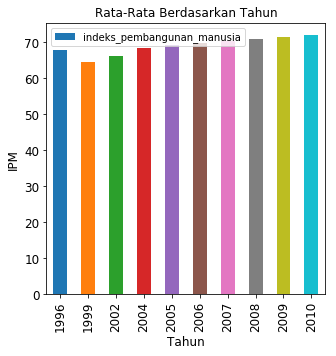

In [21]:
#### rata rata untuk tiap tahunnya
plt.rcParams['figure.figsize'] =5,5
ax = datanotNull.groupby('tahun').mean()['indeks_pembangunan_manusia']
ax = ax.plot(kind='bar', title ="Rata-Rata Berdasarkan Tahun", legend=True, fontsize=12)
ax.set_xlabel("Tahun", fontsize=12)
ax.set_ylabel("IPM", fontsize=12)

In [22]:
#### rata rata untuk tiap provinsi
plt.rcParams['figure.figsize'] =10,6
ax = datanotNull.groupby('nama_provinsi').mean()['indeks_pembangunan_manusia']
ax = ax.plot(kind='bar', title ="Rata-Rata tiap Provinsi", legend=True, fontsize=12)
ax.set_xlabel("provinsi", fontsize=12)
ax.set_ylabel("IPM", fontsize=12)

Text(0,0.5,'IPM')

In [23]:
plt.rcParams['figure.figsize'] =10,5
stdvDF.plot(kind='bar', title ="standar deviasi tiap Provinsi", legend=True, fontsize=12)
plt.xticks(list(range(0,33)),provIPM, rotation='vertical')

([<matplotlib.axis.XTick at 0x11d3f6be0>,
 <a list of 33 Text xticklabel objects>)

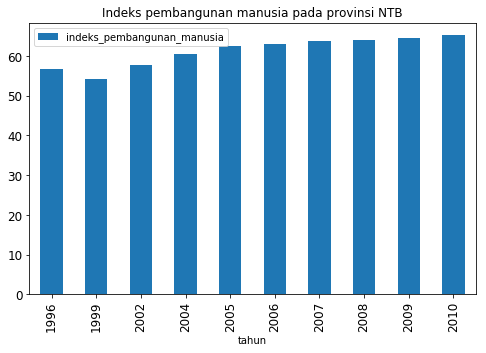

In [27]:
dataNTB = dataIPM[dataIPM.nama_provinsi=='Prov. Nusa Tenggara Barat']
dataNTB.index = dataNTB.tahun
NTB = dataNTB[['tahun','indeks_pembangunan_manusia']]
plt.rcParams['figure.figsize'] =8,5
NTB.plot(kind='bar', title ="Indeks pembangunan manusia pada provinsi NTB", legend=True, fontsize=12)

In [28]:
stdvDF[(stdvDF.nama_provinsi=='Prov. Nusa Tenggara Barat')|(stdvDF.nama_provinsi=='Prov. DKI Jakarta')]

nama_provinsi  nilai_standar_deviasi
4           Prov. DKI Jakarta                   1.43
20  Prov. Nusa Tenggara Barat                   3.78

dari visualisasi sederhana diatas terlihat bahwa: 
        
    > rata-rata Indeks Pembangunan Manusia terendah terdapat di Provinsi Nusa Tenggara Barat
    > rata-rata IPM tertinggi terdapat di Prov. DKI jakarta. 
    > rata rata terendah IPM terjadi pada tahun 1999, dan semenjak saat itu rata rata IPM selalu meningkat tiap tahunnya.
    > ketika dilihat pada diagram standar deviasi tiap provinsi
        rata2 standar deviasi tiap provinsi = 2.35
        standar deviasi Prov. NTB = 3.78 (standar deviasi tertiggi)
        standar deviasi Prov. DKI Jakarta = 1.43
        
        NTB adalah prov dg SD tertinggi dan rata2 IPM terendah namun Indeks Pembangunan Manusia nya meningkat setiap tahunnya kecuali pada tahun 1999. penurunan IPM pada tahun 1999 yg terjadi pada provinsi NTB adalah hal yang wajar. karena jika dilihat dari visualisai rata rata IPM berdasarkan tahun, rata rata semua provinsi mengalami penurunan IPM di tahun 1999. 
        